<a href="https://colab.research.google.com/github/psrana/Image-Processing-using-OpenCV-By-Shailendra-Tiwari/blob/main/3_Color_Spaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **Color Spaces**

In this lesson we'll learn to:
1. View the individual channels of an RGB Image
2. Manipulate a color space
3. Introduce HSV Color Spaces

In [ ]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our images
#!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
#!unzip -qq images.zip

--2025-06-22 07:07:41--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.142.6, 3.5.246.182, 3.5.244.11, ...
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.142.6|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2025-06-22 07:07:41 ERROR 404: Not Found.

unzip:  cannot find or open images.zip, images.zip.zip or images.zip.ZIP.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load our input image
image = cv2.imread('/content/drive/MyDrive/Classroom/Modern_Computer_Vision/images/tobago.jpg')
# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load the image. Please check the file path.")
else:
    from google.colab.patches import cv2_imshow
    cv2_imshow(image)
    # Use cv2.split to get each color space separately
    B, G, R = cv2.split(image)
    print(B.shape)
    print(G.shape)
    print(R.shape)

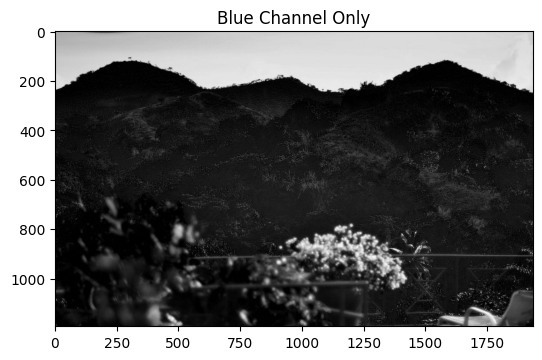

In [ ]:
# Each color space on it's on will look like a grayscale as it lacks the other color channels
imshow("Blue Channel Only", B)

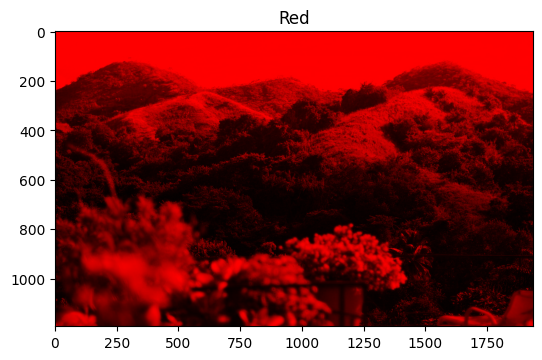

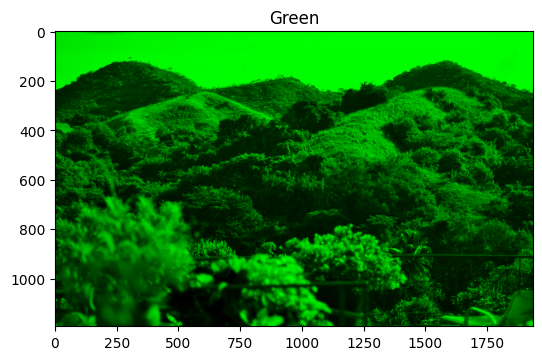

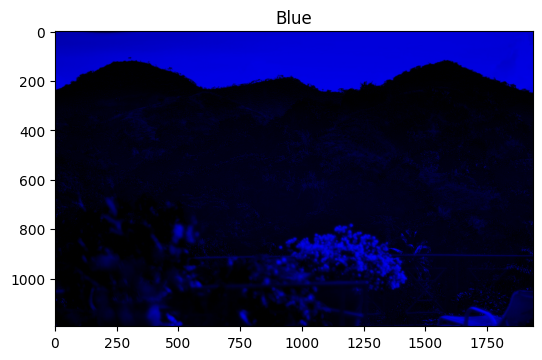

In [ ]:
import numpy as np

# Let's create a matrix of zeros
# with dimensions of the image h x w
zeros = np.zeros(image.shape[:2], dtype = "uint8")

imshow("Red", cv2.merge([zeros, zeros, R]))
imshow("Green", cv2.merge([zeros, G, zeros]))
imshow("Blue", cv2.merge([B, zeros, zeros]))

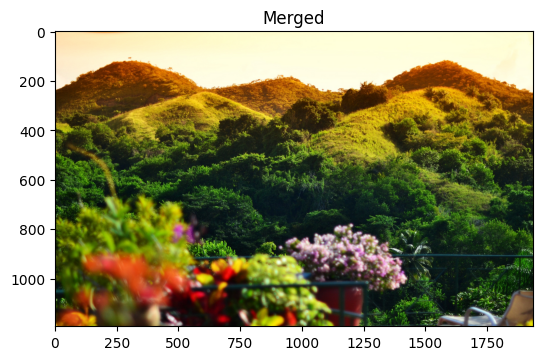

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Classroom/Modern_Computer_Vision/images/tobago.jpg')

# OpenCV's 'split' function splites the image into each color index
B, G, R = cv2.split(image)

# Let's re-make the original image,
merged = cv2.merge([B, G, R])
imshow("Merged", merged)

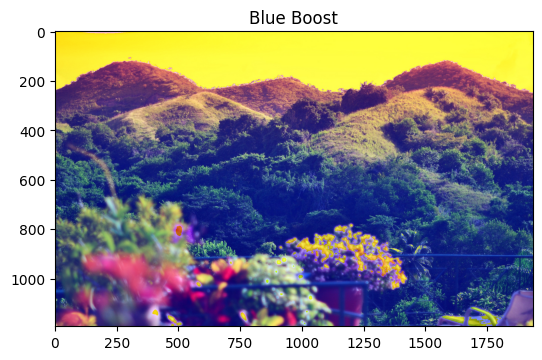

In [ ]:
# Let's amplify the blue color
merged = cv2.merge([B+100, G, R])
imshow("Blue Boost", merged)

## **The HSV Color Space**

![](https://upload.wikimedia.org/wikipedia/commons/f/f2/HSV_color_solid_cone.png)

- Hue: 0 - 179
- Saturation: 0 - 255
- Value (Intensity): 0 - 255

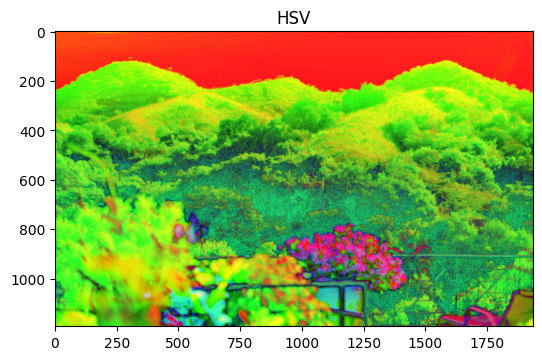

In [ ]:
# Reload our image
image = cv2.imread('/content/drive/MyDrive/Classroom/Modern_Computer_Vision/images/tobago.jpg')

# Convert to HSV
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
imshow('HSV', hsv_image)

#### This looks odd....why?

Because our plotting function was designed for RGB only images, not HSV

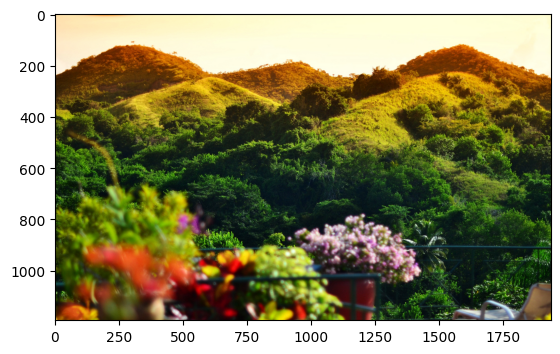

In [ ]:
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB))
plt.show()

### **Let's view each channel type in the HSV Color Space representation**

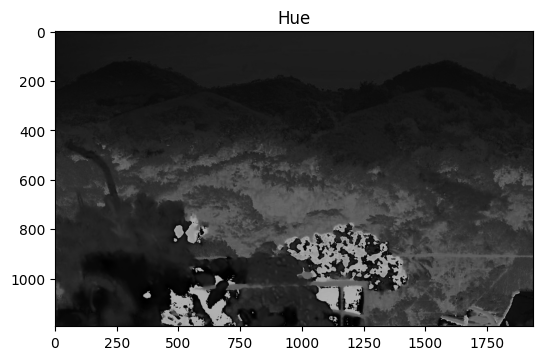

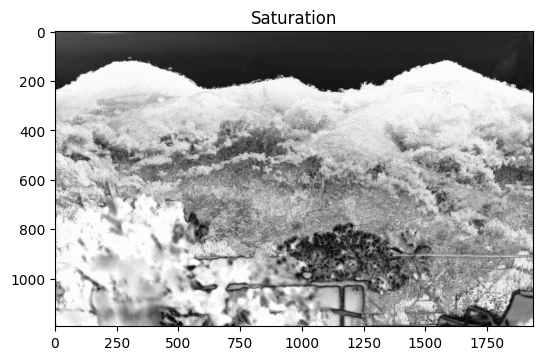

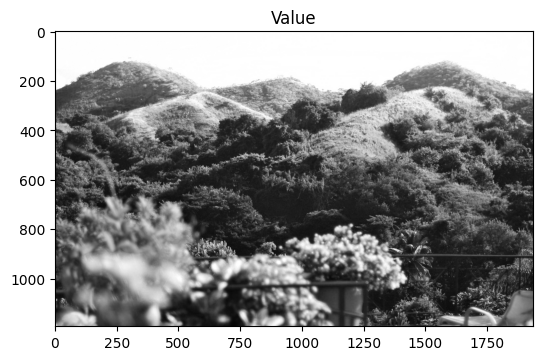

In [ ]:
# Switching back to viewing the RGB representation
imshow("Hue", hsv_image[:, :, 0])
imshow("Saturation", hsv_image[:, :, 1])
imshow("Value", hsv_image[:, :, 2])